In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [229]:
data1 = pd.read_csv('purchase_data.csv')  # Change this to your file path
data2 = pd.read_csv('promotion_data.csv')  # Change this to your file path
data = pd.merge(data1, data2, left_index=True, right_index=True, how='inner')

print(data.head())

   customer_id_x  purchase_price  num_items            timestamp day_of_week  \
0            181           62.17         10  2023-01-01 10:29:00      Sunday   
1             20            6.63         10  2023-01-02 13:46:00      Monday   
2             62           76.99          1  2023-01-02 18:59:00      Monday   
3             12           89.32          1  2023-01-03 07:15:00     Tuesday   
4             44           11.84          3  2023-01-03 19:49:00     Tuesday   

   hour_of_day  is_weekend  customer_id_y  promotion_timestamp  clicked  
0           10           1            181  2023-01-14 03:29:00        0  
1           13           0             20  2023-01-08 14:46:00        0  
2           18           0             62  2023-01-19 21:59:00        1  
3            7           0             12  2023-01-03 22:15:00        1  
4           19           0             44  2023-01-22 22:49:00        0  


In [230]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id_x        1000 non-null   int64  
 1   purchase_price       1000 non-null   float64
 2   num_items            1000 non-null   int64  
 3   timestamp            1000 non-null   object 
 4   day_of_week          1000 non-null   object 
 5   hour_of_day          1000 non-null   int64  
 6   is_weekend           1000 non-null   int64  
 7   customer_id_y        1000 non-null   int64  
 8   promotion_timestamp  1000 non-null   object 
 9   clicked              1000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB
None


In [231]:
print(data.isnull().sum())


customer_id_x          0
purchase_price         0
num_items              0
timestamp              0
day_of_week            0
hour_of_day            0
is_weekend             0
customer_id_y          0
promotion_timestamp    0
clicked                0
dtype: int64


In [232]:
# Convert time column to datetime (assuming column name is 'timestamp')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['promotion_timestamp'] = pd.to_datetime(data['promotion_timestamp'])
data['month'] = data['timestamp'].dt.month
data['day_of_week'] = data['timestamp'].dt.weekday
data['promotion_month'] = data['promotion_timestamp'].dt.month
data['promotion_day_of_week'] = data['promotion_timestamp'].dt.weekday
data['promotion_hour'] = data['promotion_timestamp'].dt.hour


In [233]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id_x          1000 non-null   int64         
 1   purchase_price         1000 non-null   float64       
 2   num_items              1000 non-null   int64         
 3   timestamp              1000 non-null   datetime64[ns]
 4   day_of_week            1000 non-null   int32         
 5   hour_of_day            1000 non-null   int64         
 6   is_weekend             1000 non-null   int64         
 7   customer_id_y          1000 non-null   int64         
 8   promotion_timestamp    1000 non-null   datetime64[ns]
 9   clicked                1000 non-null   int64         
 10  month                  1000 non-null   int32         
 11  promotion_month        1000 non-null   int32         
 12  promotion_day_of_week  1000 non-null   int32         
 13  prom

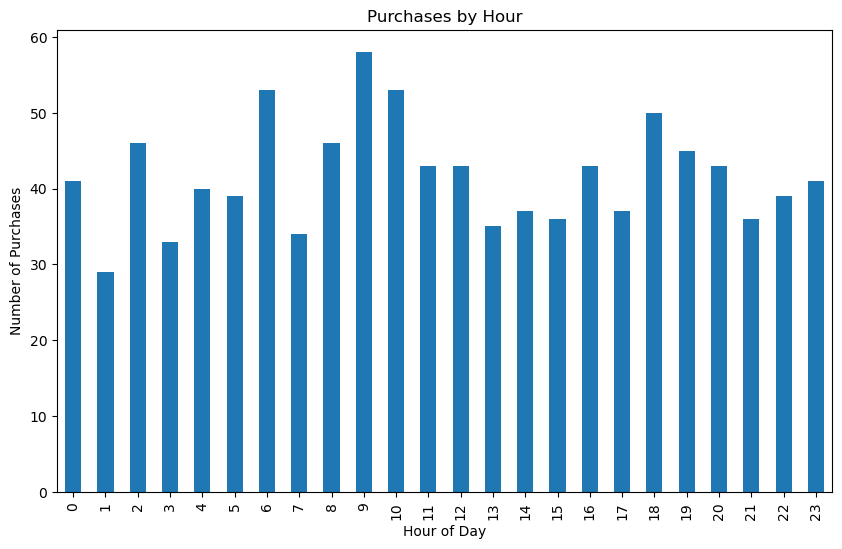

In [234]:
# Plot purchases by hour of the day
purchase_by_hour = data.groupby('hour_of_day').size()

plt.figure(figsize=(10, 6))
purchase_by_hour.plot(kind='bar')
plt.title('Purchases by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.show()


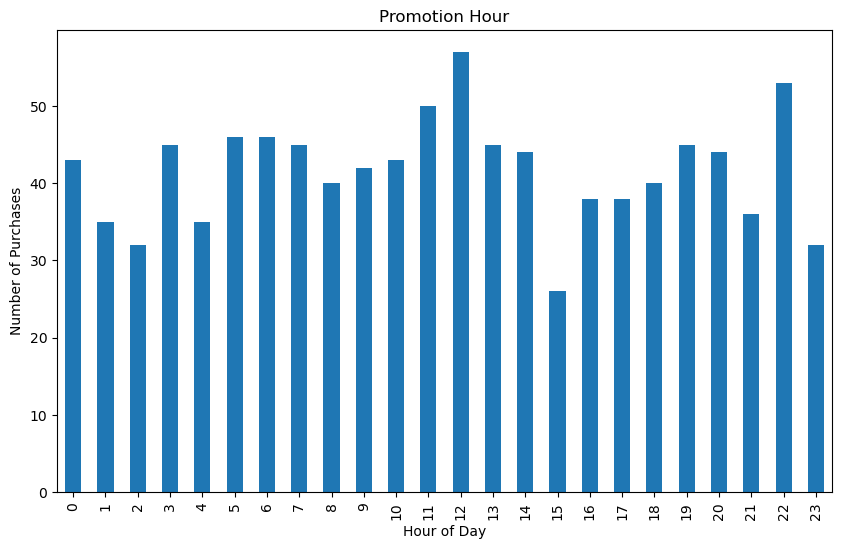

In [235]:
# Plot purchases by hour of the day
purchase_by_hour = data.groupby('promotion_hour').size()

plt.figure(figsize=(10, 6))
purchase_by_hour.plot(kind='bar')
plt.title('Promotion Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.show()


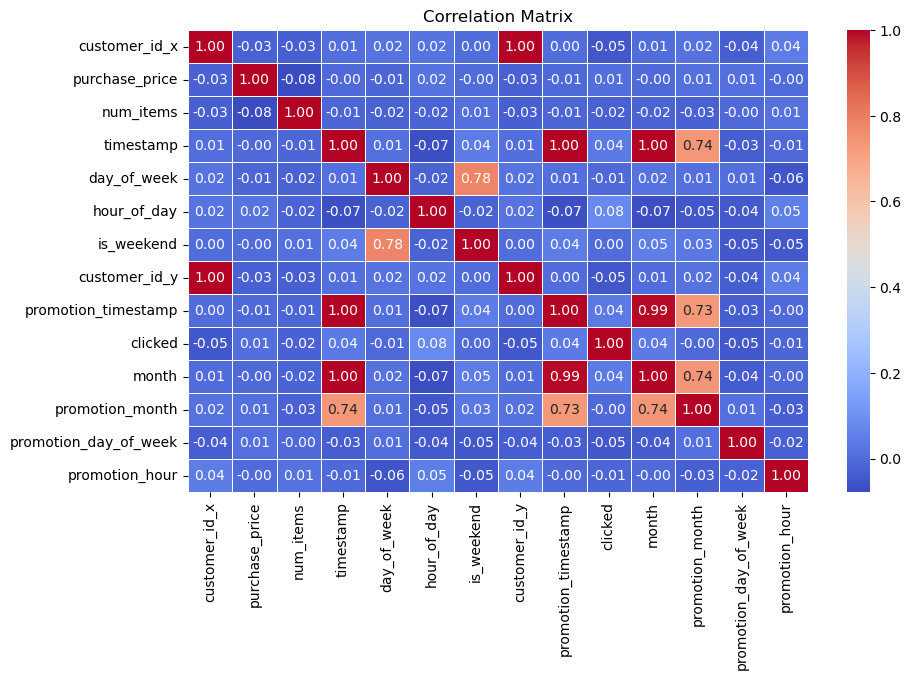

In [236]:
# Plot correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [237]:
# Calculate time difference base on hours
data['promotion_diff_hours'] = (data['promotion_timestamp']- data['timestamp']).dt.total_seconds() / 3600

# check the new feature
print(data[['promotion_timestamp', 'timestamp', 'promotion_diff_hours']].head())

  promotion_timestamp           timestamp  promotion_diff_hours
0 2023-01-14 03:29:00 2023-01-01 10:29:00                 305.0
1 2023-01-08 14:46:00 2023-01-02 13:46:00                 145.0
2 2023-01-19 21:59:00 2023-01-02 18:59:00                 411.0
3 2023-01-03 22:15:00 2023-01-03 07:15:00                  15.0
4 2023-01-22 22:49:00 2023-01-03 19:49:00                 459.0


In [238]:
data = data.drop(['customer_id_y','timestamp','promotion_timestamp'], axis=1)

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id_x          1000 non-null   int64  
 1   purchase_price         1000 non-null   float64
 2   num_items              1000 non-null   int64  
 3   day_of_week            1000 non-null   int32  
 4   hour_of_day            1000 non-null   int64  
 5   is_weekend             1000 non-null   int64  
 6   clicked                1000 non-null   int64  
 7   month                  1000 non-null   int32  
 8   promotion_month        1000 non-null   int32  
 9   promotion_day_of_week  1000 non-null   int32  
 10  promotion_hour         1000 non-null   int32  
 11  promotion_diff_hours   1000 non-null   float64
dtypes: float64(2), int32(5), int64(5)
memory usage: 74.3 KB


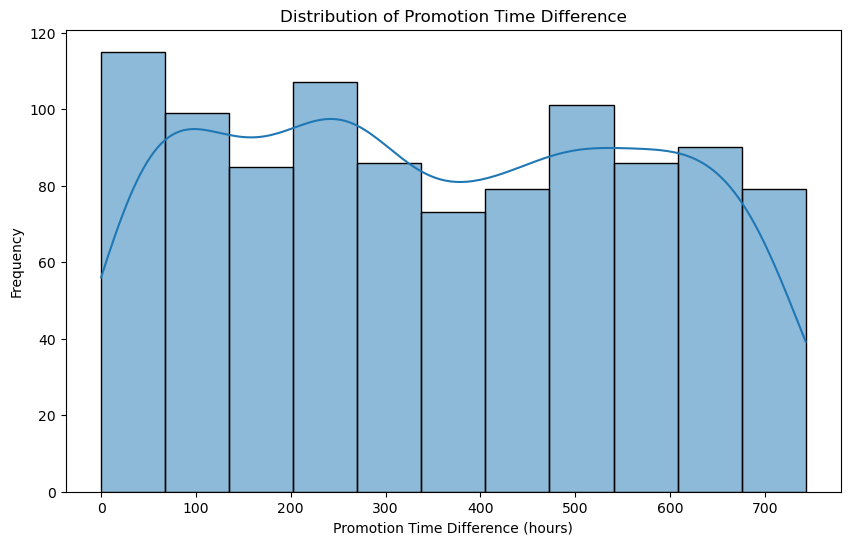

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['promotion_diff_hours'], kde=True)
plt.title('Distribution of Promotion Time Difference')
plt.xlabel('Promotion Time Difference (hours)')
plt.ylabel('Frequency')
plt.show()


#Feature Engineerning

In [241]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standarize
data[['purchase_price', 'num_items']] = scaler.fit_transform(data[['purchase_price', 'num_items']])


In [242]:
data['promotion_diff_hours_log'] = np.log1p(data['promotion_diff_hours'])


In [243]:
from sklearn.model_selection import train_test_split

# Feature Selection
X = data.drop(columns=['promotion_diff_hours', 'customer_id_x','promotion_diff_hours_log'])


y = data['promotion_diff_hours_log']  

# train/test split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# train/valid split
x_train, x_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)



In [244]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
print(x_train)

# Prediction
y_pred = model.predict(x_val)

# Moudle Evaluation
mae_rf = mean_absolute_error(y_val, y_pred)
print(f'Mean Absolute Error: {mae_rf}')


     purchase_price  num_items  day_of_week  hour_of_day  is_weekend  clicked  \
307        0.614261  -1.194006            3            6           0        0   
208       -0.739755   1.559539            4            2           0        0   
901       -0.995244   1.559539            1            2           0        1   
210        1.673594   0.182766            4            8           0        0   
713        1.108544   1.559539            2           17           0        1   
..              ...        ...          ...          ...         ...      ...   
554        0.400870   0.182766            5           12           1        1   
938       -1.462672   1.559539            4           18           0        1   
522       -1.398437  -0.849813            2           18           0        0   
677        1.041768   0.526959            1            2           0        1   
936       -0.194302  -1.538199            4           11           0        0   

     month  promotion_month

In [245]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse)

# R²
r2_rf = r2_score(y_test, y_pred)

print(f'MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}')

MSE: 1.0234815423252046, RMSE: 0.00652015505115791, R²: -0.05640770944892015


In [246]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# SVR
svr_model = SVR(kernel='rbf')

# train
svr_model.fit(x_train, y_train)

# prediction
y_pred_svr = svr_model.predict(x_val)

# Moudle Evaluation
mae_svr = mean_absolute_error(y_val, y_pred_svr)
print(f'Mean Absolute Error (SVR): {mae_svr}')


Mean Absolute Error (SVR): 0.7373322154305184


In [247]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse)

# R²
r2_svr = r2_score(y_test, y_pred_svr)

print(f'MSE: {rmse_svr}, RMSE: {rmse_svr}, R²: {r2_svr}')

MSE: 0.00652015505115791, RMSE: 0.00652015505115791, R²: -0.13314573787795458


In [248]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Gradient Boosting
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# train
gbr_model.fit(x_train, y_train)

# prediction
y_pred_gbr = gbr_model.predict(x_val)

# Moudle Evaluation
mae_gbr = mean_absolute_error(y_val, y_pred_gbr)
print(f'Mean Absolute Error (Gradient Boosting): {mae_gbr}')


Mean Absolute Error (Gradient Boosting): 1.0265399067443832


In [249]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse)

# R²
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'MSE: {mse_gbr}, RMSE: {rmse_gbr}, R²: {r2_gbr}')

MSE: 1.5951315917498943, RMSE: 0.00652015505115791, R²: -0.6464481687493719


In [250]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# KNN
knn_model = KNeighborsRegressor(n_neighbors=5)

# train
knn_model.fit(x_train, y_train)

# prediction
y_pred_knn = knn_model.predict(x_val)

# Moudle Evaluation
mae_knn = mean_absolute_error(y_val, y_pred_knn)
print(f'Mean Absolute Error (KNN): {mae_knn}')


Mean Absolute Error (KNN): 0.929998113758377


In [251]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse)

# R²
r2_knn = r2_score(y_test, y_pred_knn)

print(f'MSE: {mse_knn}, RMSE: {rmse_knn}, R²: {r2_knn}')

MSE: 1.3939815594330374, RMSE: 0.00652015505115791, R²: -0.43882698936526143


In [252]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# Lasso
lasso_model = Lasso(alpha=0.1)

# train
lasso_model.fit(x_train, y_train)

# prediction
y_pred_lasso = lasso_model.predict(x_val)

# moudle evaluation
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
print(f'Mean Absolute Error (Lasso): {mae_lasso}')


Mean Absolute Error (Lasso): 0.702244854389112


In [253]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse)

# R²
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'MSE: {mse_lasso}, RMSE: {rmse_lasso}, R²: {r2_lasso}')

MSE: 0.9102115796614679, RMSE: 0.00652015505115791, R²: 0.060506232677592364


In [254]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# train
lgb_model.fit(x_train, y_train)

# prediction

y_pred_lgb = lgb_model.predict(x_val)

# moudle evaluation
mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
print(f'Mean Absolute Error (LightGBM): {mae_lgb}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 10
[LightGBM] [Info] Start training from score 5.513332
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [255]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse)

# R²
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f'MSE: {mse_lgb}, RMSE: {rmse_lgb}, R²: {r2_lgb}')

MSE: 1.27338417023419, RMSE: 0.00652015505115791, R²: -0.3143498919086336


In [256]:
# compare MAE
models = ['Random Forest', 'SVR', 'Gradient Boosting', 'KNN', 'Lasso',  'LightGBM']
mae_values = [mae_rf, mae_svr, mae_gbr, mae_knn, mae_lasso, mae_lgb]
mse_values = [mse_rf, mse_svr, mse_gbr, mse_knn, mse_lasso, mse_lgb]
rmse_values = [rmse_rf, rmse_svr, rmse_gbr, rmse_knn, rmse_lasso, rmse_lgb]
r2_values = [r2_rf, r2_svr,r2_gbr, r2_knn, r2_lasso, r2_lgb]
# Create DataFrame to display the results
results = pd.DataFrame({'Model': models, 'Mean Absolute Error': mae_values,'Mean Standard Error':mse_values, 'R-Squared':r2_values})
results = results.sort_values(by='Mean Standard Error', ascending=True)

# Display results
print(results)

               Model  Mean Absolute Error  Mean Standard Error  R-Squared
4              Lasso             0.702245             0.910212   0.060506
0      Random Forest             0.785425             1.023482  -0.056408
1                SVR             0.737332             1.097828  -0.133146
5           LightGBM             0.867342             1.273384  -0.314350
3                KNN             0.929998             1.393982  -0.438827
2  Gradient Boosting             1.026540             1.595132  -0.646448


#Final Moudle

In [257]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# Lasso
lasso_model = Lasso(alpha=0.1)

# train
lasso_model.fit(X_train, Y_train)

# prediction
y_pred_lasso_train = lasso_model.predict(X_temp)

# moudle evaluation
mae_lasso = mean_absolute_error(Y_temp, y_pred_lasso_train)
print(f'Mean Absolute Error (Lasso): {mae_lasso}')

Mean Absolute Error (Lasso): 0.7970339988105085



Feature Importances (Lasso):
                 Feature  Coefficient  Importance
7        promotion_month    -0.012853    0.012853
9         promotion_hour     0.004797    0.004797
3            hour_of_day     0.002882    0.002882
0         purchase_price    -0.000000    0.000000
1              num_items     0.000000    0.000000
2            day_of_week    -0.000000    0.000000
4             is_weekend    -0.000000    0.000000
5                clicked     0.000000    0.000000
6                  month    -0.000000    0.000000
8  promotion_day_of_week     0.000000    0.000000


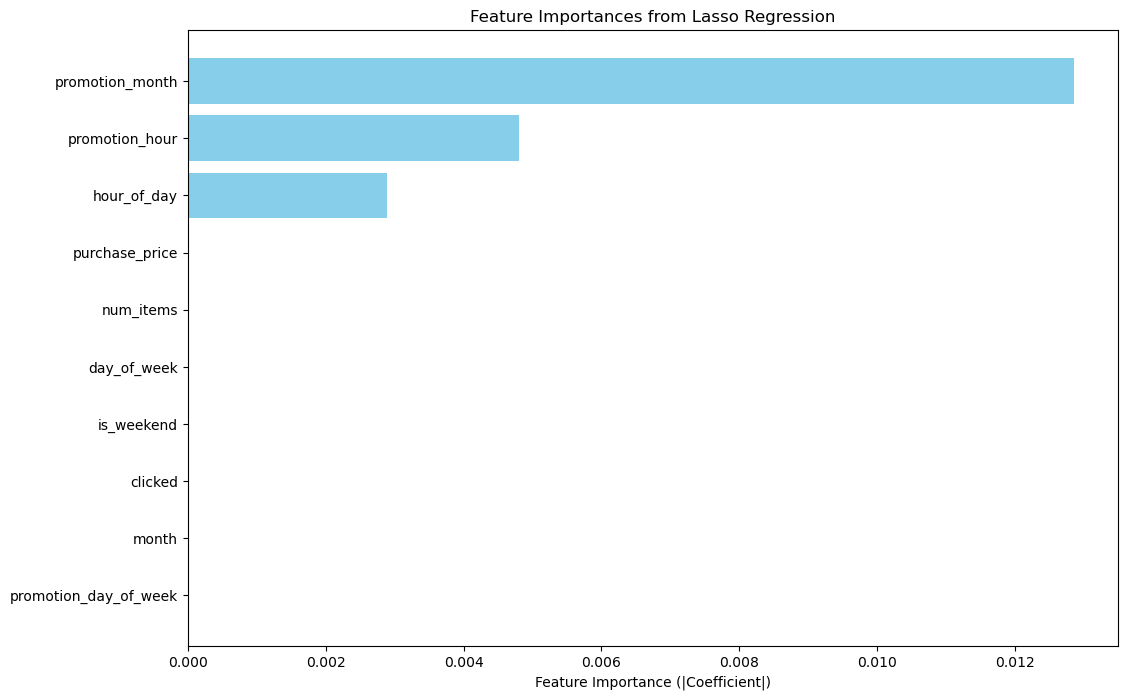

In [258]:
#Feature Importance
lasso_coefficients = lasso_model.coef_
features = X_train.columns

# create DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': lasso_coefficients,
    'Importance': np.abs(lasso_coefficients)
}).sort_values(by='Importance', ascending=False)

#  Print the ranking
print("\nFeature Importances (Lasso):")
print(importance_df)

#  Visualization
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance (|Coefficient|)')
plt.title('Feature Importances from Lasso Regression')
plt.show()